In [1]:
import pandas as pd
pd.set_option("display.max_columns", 500)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
data.head(2)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0


## UNIVARIATE ANALYSIS

,Diabetes_binary
0.0,86.066698
1.0,13.933302


<AxesSubplot:>

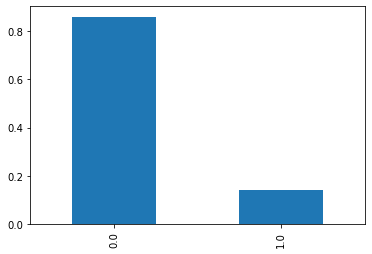

In [2]:
display((data['Diabetes_binary'].value_counts(normalize = True)*100).to_frame())
data['Diabetes_binary'].value_counts(normalize=True).plot(kind='bar')

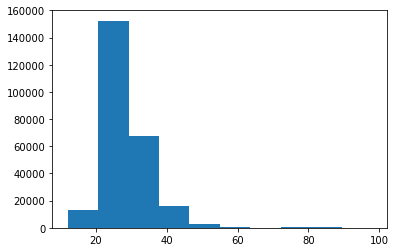

In [3]:
### MOST OF THE VALUE FALL FROM THE RANGE OF 20 - 30
plt.hist(data['BMI'], bins=10)
plt.show()

### BI-VARIATE ANALYSIS

Sex,0.0,1.0
Diabetes_binary,,
0.0,123563,94771
1.0,18411,16935


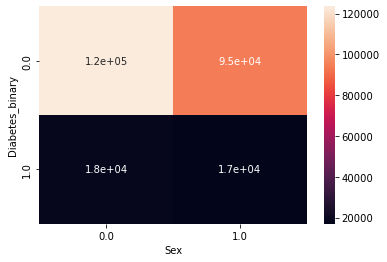

In [4]:
display(pd.crosstab(data['Diabetes_binary'], data['Sex']))
sns.heatmap(pd.crosstab(data['Diabetes_binary'], data['Sex']), annot=True);

HighBP,0.0,1.0
HighChol,,
0.0,101920,44169
1.0,42931,64660


<AxesSubplot:xlabel='HighBP', ylabel='HighChol'>

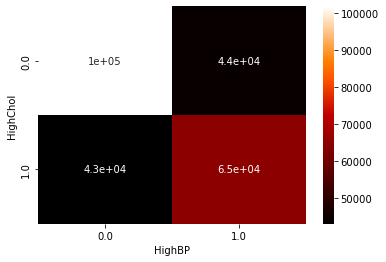

In [5]:
display(pd.crosstab(data['HighChol'], data['HighBP']))
sns.heatmap(pd.crosstab(data['HighChol'], data['HighBP']), annot=True, cmap ='gist_heat')

#### In this section, we'll look at how different category variables relate to whether a patient has autism or not by utilizing the Chi-Square method.

#### Note: Finding relationships between categorical data via correlation is one of data science's pitfalls.

#### Formulate our hypothesis
#### H0 - The feature did not have significance difference with Diabetes class.

#### H1 - The feature checked have significant difference with Diabetes class.

#### If the p-value is > 0.05 hence the feature did not have significance effect on Diabetes class and vice versa.

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy.stats import chisquare, chi2_contingency ## Stastical test

def chi_check(var1, var2, significance_level=None):
  tab_class = pd.crosstab(data[var1], data[var2], margins=True)
  tab_values = np.array([tab_class.iloc[0].values,
                  tab_class.iloc[1].values])
  stat, p, dof, expected_value= chi2_contingency(tab_values)
  print("p value: " + str(p)) 
  if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
  else:
    print('ACCEPT NULL HYPOTHESIS')

In [7]:
chi_check('HighBP', 'HighChol', significance_level=0.05)
chi_check('HighBP', 'Diabetes_binary', significance_level=0.05)
chi_check('HighChol', 'Diabetes_binary', significance_level=0.05)
chi_check('CholCheck', 'HighChol', significance_level=0.05)

p value: 0.0
Reject NULL HYPOTHESIS
p value: 0.0
Reject NULL HYPOTHESIS
p value: 0.0
Reject NULL HYPOTHESIS
p value: 0.0
Reject NULL HYPOTHESIS


In [10]:
dataset_table=pd.crosstab(data['HighBP'],data['HighChol'])
print(dataset_table)

HighChol     0.0    1.0
HighBP                 
0.0       101920  42931
1.0        44169  64660


In [11]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[101920  42931]
 [ 44169  64660]]


In [14]:
import scipy.stats as stats
val=stats.chi2_contingency(dataset_table)
val

(22556.72176125731,
 0.0,
 1,
 array([[83416.65775386, 61434.34224614],
        [62672.34224614, 46156.65775386]]))

In [15]:
Expected_Values=val[3]
Expected_Values

array([[83416.65775386, 61434.34224614],
       [62672.34224614, 46156.65775386]])

In [16]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [17]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [18]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 22557.940872690833


In [19]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [20]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0


In [21]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


### FEATURE SELECTION WITH CHI - SQUARE

In [26]:
data = data.astype('int64')
x = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

In [32]:
from sklearn.feature_selection import chi2
f_score=chi2(x,y)   #returns f score and p value 
f_score

(array([1.00290139e+04, 5.85971058e+03, 3.97168252e+01, 1.83551664e+04,
        5.21978858e+02, 2.72522519e+03, 7.22197538e+03, 8.61887532e+02,
        1.54291404e+02, 1.53169215e+02, 7.79424807e+02, 3.28093847e+00,
        2.29542412e+02, 9.93850778e+03, 2.10296322e+04, 1.33424407e+05,
        1.00595064e+04, 1.40248274e+02, 9.27614120e+03, 7.56035496e+02,
        4.82981636e+03]),
 array([0.00000000e+000, 0.00000000e+000, 2.93585367e-010, 0.00000000e+000,
        1.57042296e-115, 0.00000000e+000, 0.00000000e+000, 1.89327093e-189,
        2.00007326e-035, 3.51796340e-035, 1.60528118e-171, 7.00888408e-002,
        7.50127847e-052, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 2.34921223e-032, 0.00000000e+000, 1.95467454e-166,
        0.00000000e+000]))

In [43]:
p_value=pd.Series(f_score[1],index=x.columns).to_frame().sort_values(by = 0,ascending = False).reset_index().rename(columns={'index':"Feature_name",0:"P_value"})
p_value

,Feature_name,P_value
0,AnyHealthcare,7.008884e-02
1,CholCheck,2.935854e-10
2,Sex,2.349212e-32
3,Veggies,3.517963e-35
4,Fruits,2.000073e-35
5,NoDocbcCost,7.501278e-52
6,Smoker,1.570423e-115
7,Education,1.954675e-166
8,HvyAlcoholConsump,1.605281e-171
9,PhysActivity,1.893271e-189


In [47]:
level_of_significance = 0.05
p_value['Decision'] = np.where(p_value['P_value'] < 0.05, 'Reject Null Hypothesis', 'Accept Null Hypothesis')
p_value

,Feature_name,P_value,Decision
0,AnyHealthcare,7.008884e-02,Accept Null Hypothesis
1,CholCheck,2.935854e-10,Reject Null Hypothesis
2,Sex,2.349212e-32,Reject Null Hypothesis
3,Veggies,3.517963e-35,Reject Null Hypothesis
4,Fruits,2.000073e-35,Reject Null Hypothesis
5,NoDocbcCost,7.501278e-52,Reject Null Hypothesis
6,Smoker,1.570423e-115,Reject Null Hypothesis
7,Education,1.954675e-166,Reject Null Hypothesis
8,HvyAlcoholConsump,1.605281e-171,Reject Null Hypothesis
9,PhysActivity,1.893271e-189,Reject Null Hypothesis


In [52]:
from sklearn.model_selection import train_test_split
x = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

# Separating the 80% data for training data and 20% for testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state =3, stratify=y)

In [58]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
algos = [LogisticRegression(), 
        #SVC(kernel='linear', random_state=0, probability=True),
         GaussianNB(),
         ExtraTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5,n_estimators=1000, max_features='auto', class_weight='balanced'),
        DecisionTreeClassifier(max_depth=5),
        CatBoostClassifier(eval_metric='AUC', metric_period=20, logging_level='Silent'),
        LGBMClassifier(n_estimators=500),
         XGBClassifier(max_depth=4, n_estimators=500),]

names = ['Logistic_Regression','Guassian','ExtraTree','RandomForest','Decision_Tree','Catboost', 'Lightgbm', 'Xgboost']
roc_list = []

In [59]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    score= roc_auc_score(y_test,y_pred)
    roc_list.append(score)

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [60]:
evaluation = pd.DataFrame({'Model': names,
                           'Score': roc_list})

In [61]:
evaluation = evaluation.sort_values(by='Score', ascending=False)


In [62]:
evaluation


,Model,Score
5,Catboost,0.828933
6,Lightgbm,0.828274
7,Xgboost,0.826216
3,RandomForest,0.818549
0,Logistic_Regression,0.814885
4,Decision_Tree,0.805357
1,Guassian,0.786809
2,ExtraTree,0.727032
